In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score
from sklearn import metrics
import numpy as np
from sklearn.metrics import cohen_kappa_score
from sklearn import tree
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from math import sqrt


# Load **Dataset**

In [4]:
data = pd.read_csv(open('/content/drive/My Drive/Colab Notebooks/breast-cancer-dataset.csv','rb'))

data.head(7)

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,label
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2


In [5]:

label=data['label']
data=data.drop(['label'],axis=1)
label.head(7)

0    2
1    2
2    2
3    2
4    2
5    4
6    2
Name: label, dtype: int64

In [6]:
features=data.replace(to_replace =["?"], value =0) 
features.to_excel("features.xlsx") 

# **Training**

In [7]:
important_features=features[['single_epithelial_cell_size', 'bare_nuclei', 'normal_nucleoli', 'mitoses']]
important_features.head()

,single_epithelial_cell_size,bare_nuclei,normal_nucleoli,mitoses
0,2,1,1,1
1,7,10,2,1
2,2,2,1,1
3,3,4,7,1
4,2,1,1,1


# **Random Forest**

In [20]:
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from scipy.stats import uniform, randint
random_initializer=100  
TP=[]
FP=[]
TN=[]
FN=[]
acc=[]
kf = StratifiedKFold(n_splits=10,
                     shuffle=False,
                     random_state=random_initializer)

for train_index, test_index in kf.split(important_features,label):
    print('Fold------------------------------------ ')
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = important_features.loc[train_index], important_features.loc[test_index]
    Y_Train, Y_Test = label[train_index], label[test_index]
    regressor = RandomForestRegressor(n_estimators=1, random_state=43)
    regressor.fit(X_Train, Y_Train)
    y_pred = regressor.predict(X_Test)
    y_pred=np.round(y_pred)
    # print('confusion_matrix',confusion_matrix(Y_Test,y_pred))
    print('classification_report',classification_report(Y_Test,y_pred))
    print('accuracy_score',accuracy_score(Y_Test, y_pred))
    CM = confusion_matrix(Y_Test, y_pred)
    TN.append(CM[0][0])
    FN.append(CM[1][0])
    TP.append(CM[1][1])
    FP.append(CM[0][1])
    acc.append(accuracy_score(Y_Test, y_pred))



Fold------------------------------------ 
classification_report               precision    recall  f1-score   support

           2       0.89      0.89      0.89        46
           4       0.79      0.79      0.79        24

    accuracy                           0.86        70
   macro avg       0.84      0.84      0.84        70
weighted avg       0.86      0.86      0.86        70

accuracy_score 0.8571428571428571
Fold------------------------------------ 
classification_report               precision    recall  f1-score   support

         2.0       0.94      0.96      0.95        46
         3.0       0.00      0.00      0.00         0
         4.0       0.90      0.79      0.84        24

    accuracy                           0.90        70
   macro avg       0.61      0.58      0.60        70
weighted avg       0.93      0.90      0.91        70

accuracy_score 0.9
Fold------------------------------------ 
classification_report               precision    recall  f1-score   s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F

In [23]:
    TN,FP,FN,TP=confusion_matrix(Y_Test,y_pred).ravel()
    #Sensitivity or true positive rate
    TPR = TP/(TP+FN)
    print('True positive Rate:', TPR)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    print('True Negative Rate:', TNR)

    FPR=FP/(FP+TN)
    print('False Positive Rate',FPR)

True positive Rate: 0.9166666666666666
True Negative Rate: 0.9555555555555556
False Positive Rate 0.044444444444444446


In [9]:
np.average(acc)

0.9142028985507246

# **NaiveBayes**

In [25]:
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from scipy.stats import uniform, randint
random_initializer=100  
TP=[]
FP=[]
TN=[]
FN=[]
acc=[]
kf = StratifiedKFold(n_splits=10,
                     shuffle=False,
                     random_state=random_initializer)

for train_index, test_index in kf.split(important_features,label):
    print('Fold------------------------------------ ')
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = important_features.loc[train_index], important_features.loc[test_index]
    Y_Train, Y_Test = label[train_index], label[test_index]
    
    gnb = GaussianNB()
    y_pred = gnb.fit(X_Train, Y_Train).predict(X_Test)
    print('confusion_matrix',confusion_matrix(Y_Test,y_pred))
    print('classification_report',classification_report(Y_Test,y_pred))
    print('accuracy_score',accuracy_score(Y_Test, y_pred))
    CM = confusion_matrix(Y_Test, y_pred)
    TN.append(CM[0][0])
    FN.append(CM[1][0])
    TP.append(CM[1][1])
    FP.append(CM[0][1])
    acc.append(accuracy_score(Y_Test, y_pred))
np.mean(acc)

Fold------------------------------------ 
confusion_matrix [[41  5]
 [ 3 21]]
classification_report               precision    recall  f1-score   support

           2       0.93      0.89      0.91        46
           4       0.81      0.88      0.84        24

    accuracy                           0.89        70
   macro avg       0.87      0.88      0.88        70
weighted avg       0.89      0.89      0.89        70

accuracy_score 0.8857142857142857
Fold------------------------------------ 
confusion_matrix [[44  2]
 [ 1 23]]
classification_report               precision    recall  f1-score   support

           2       0.98      0.96      0.97        46
           4       0.92      0.96      0.94        24

    accuracy                           0.96        70
   macro avg       0.95      0.96      0.95        70
weighted avg       0.96      0.96      0.96        70

accuracy_score 0.9571428571428572
Fold------------------------------------ 
confusion_matrix [[43  3]
 [ 0 24]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.952815734989648

In [26]:
    TN,FP,FN,TP=confusion_matrix(Y_Test,y_pred).ravel()
    #Sensitivity or true positive rate
    TPR = TP/(TP+FN)
    print('True positive Rate:', TPR)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    print('True Negative Rate:', TNR)

    FPR=FP/(FP+TN)
    print('False Positive Rate',FPR)

True positive Rate: 1.0
True Negative Rate: 0.9555555555555556
False Positive Rate 0.044444444444444446


# **Decision Tree**

In [27]:
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from scipy.stats import uniform, randint
from sklearn.tree import DecisionTreeClassifier 
random_initializer=100  
TP=[]
FP=[]
TN=[]
FN=[]
acc=[]
kf = StratifiedKFold(n_splits=10,
                     shuffle=False,
                     random_state=random_initializer)

for train_index, test_index in kf.split(important_features,label):
    print('Fold------------------------------------ ')
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = important_features.loc[train_index], important_features.loc[test_index]
    Y_Train, Y_Test = label[train_index], label[test_index]
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_Train, Y_Train)
    y_pred = clf.predict(X_Test)
    y_pred=np.round(y_pred)
    # print('confusion_matrix',confusion_matrix(Y_Test,y_pred))
    print('classification_report',classification_report(Y_Test,y_pred))
    print('accuracy_score',accuracy_score(Y_Test, y_pred))
    CM = confusion_matrix(Y_Test, y_pred)
    TN.append(CM[0][0])
    FN.append(CM[1][0])
    TP.append(CM[1][1])
    FP.append(CM[0][1])
    acc.append(accuracy_score(Y_Test, y_pred))
np.mean(acc)

Fold------------------------------------ 
classification_report               precision    recall  f1-score   support

           2       0.90      0.93      0.91        46
           4       0.86      0.79      0.83        24

    accuracy                           0.89        70
   macro avg       0.88      0.86      0.87        70
weighted avg       0.88      0.89      0.88        70

accuracy_score 0.8857142857142857
Fold------------------------------------ 
classification_report               precision    recall  f1-score   support

           2       0.88      0.98      0.93        46
           4       0.95      0.75      0.84        24

    accuracy                           0.90        70
   macro avg       0.91      0.86      0.88        70
weighted avg       0.90      0.90      0.90        70

accuracy_score 0.9
Fold------------------------------------ 
classification_report               precision    recall  f1-score   support

           2       0.98      0.96      0.97   

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9456728778467909

In [29]:
#Sensitivity or true positive rate
TPR = tp/(tp+fn)
# Specificity or true negative rate
TNR = tn/(tn+fp) 
print('True Positive Rate:', TPR)
print('True Negative Rate:', TNR)

FPR=fp/(fp+tn)
print('FPR',FPR)

True Positive Rate: 0.7916666666666666
True Negative Rate: 0.8913043478260869
FPR 0.10869565217391304


# **SVM**

In [30]:
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from scipy.stats import uniform, randint
from sklearn.tree import DecisionTreeClassifier 
random_initializer=100  
TP=[]
FP=[]
TN=[]
FN=[]
acc=[]
kf = StratifiedKFold(n_splits=10,
                     shuffle=False,
                     random_state=random_initializer)

for train_index, test_index in kf.split(important_features,label):
    print('Fold------------------------------------ ')
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = important_features.loc[train_index], important_features.loc[test_index]
    Y_Train, Y_Test = label[train_index], label[test_index]
    clf =  svm.SVC(kernel='rbf',gamma=0.1,C=0.1, degree=2)
    clf.fit(X_Train, Y_Train)
    y_pred = clf.predict(X_Test)
    y_pred=np.round(y_pred)
    # print('confusion_matrix',confusion_matrix(Y_Test,y_pred))
    print('classification_report',classification_report(Y_Test,y_pred))
    print('accuracy_score',accuracy_score(Y_Test, y_pred))
    CM = confusion_matrix(Y_Test, y_pred)
    TN.append(CM[0][0])
    FN.append(CM[1][0])
    TP.append(CM[1][1])
    FP.append(CM[0][1])
    acc.append(accuracy_score(Y_Test, y_pred))
np.mean(acc)

Fold------------------------------------ 
classification_report               precision    recall  f1-score   support

           2       0.95      0.89      0.92        46
           4       0.81      0.92      0.86        24

    accuracy                           0.90        70
   macro avg       0.88      0.90      0.89        70
weighted avg       0.91      0.90      0.90        70

accuracy_score 0.9
Fold------------------------------------ 
classification_report               precision    recall  f1-score   support

           2       0.98      0.96      0.97        46
           4       0.92      0.96      0.94        24

    accuracy                           0.96        70
   macro avg       0.95      0.96      0.95        70
weighted avg       0.96      0.96      0.96        70

accuracy_score 0.9571428571428572
Fold------------------------------------ 
classification_report               precision    recall  f1-score   support

           2       1.00      0.93      0.97   

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9556728778467909

In [31]:
#Sensitivity or true positive rate
TPR = tp/(tp+fn)
# Specificity or true negative rate
TNR = tn/(tn+fp) 
print('True Positive Rate:', TPR)
print('True Negative Rate:', TNR)

FPR=fp/(fp+tn)
print('FPR',FPR)

True Positive Rate: 0.7916666666666666
True Negative Rate: 0.8913043478260869
FPR 0.10869565217391304


























































































































































































































































































































































































# **Plot**

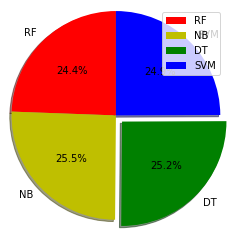

In [13]:

import matplotlib.pyplot as plt
  
# defining labels
Models = ['RF', 'NB', 'DT', 'SVM']
  
# portion covered by each label
slices = [0.94, 0.98,0.97, 0.96]
  
# color for each label
colors = ['r', 'y', 'g', 'b']
  
# plotting the pie chart
plt.pie(slices, labels = Models, colors=colors, 
        startangle=90, shadow = True, explode = (0, 0, 0.1, 0),
        radius = 1.2, autopct = '%1.1f%%')
  
# plotting legend
plt.legend()
  
# showing the plot
plt.show()